**Step 1: Research Questions & Hypotheses -> ✅ Done (PDF Generated)**

**Step - 2 : Data Preprocessing and Merging ->  ✅ Done (As Code)**

**Step 3 -> Exploratory Data Analysis (EDA) -> ✅ Done**

**Step 3 -> Data Visualization -> ✅ Done (All Graphs Included)**

**Step 4 -> Statistical Modeling - Regression Analysis -> ✅ Done (Analyzing & Modeling)**

**And also Included a brief on ->**
*   Research Study: Impact of Air Pollution and Temperature Anomalies on GD





---



**Step 1: Define Research Questions and Hypotheses**

-> Attached a PDF File

**Step - 1 : Data Preprocessing and Merging**

Step 1.1 -> Install Required Libraries

In [1]:
import pandas as pd

Step 1.2 -> Load the Datasets

In [2]:
# Load datasets
nasa_temp_df = pd.read_csv('/content/NASA_Temperature_Anomalies_Cleaned.csv')
who_pollution_df = pd.read_excel('/content/WHO_Air_Pollution_Data.xlsx')
world_bank_gdp_df = pd.read_csv('/content/World_Bank_GDP_Cleaned.csv')

Step 1.3 -> Data Cleaning and Preprocessing

In [3]:
# Rename columns for clarity and consistency
nasa_temp_df.rename(columns={'Year': 'Year', 'Temperature_Anomaly': 'Temp_Anomaly'}, inplace=True)
who_pollution_df.rename(columns={'DIM_GEO_NAME': 'Country', 'DIM_TIME_YEAR': 'Year', 'VALUE_NUMERIC': 'Air_Pollution_Index'}, inplace=True)
world_bank_gdp_df.rename(columns={'Country Name': 'Country'}, inplace=True)

# Transform World Bank GDP dataset from wide to long format
gdp_long_df = world_bank_gdp_df.melt(id_vars=['Country', 'Country Code'], var_name='Year', value_name='GDP')
gdp_long_df['Year'] = gdp_long_df['Year'].astype(int)  # Convert Year to integer

# Drop unnecessary columns in WHO dataset
who_pollution_df = who_pollution_df[['Country', 'Year', 'Air_Pollution_Index']]

# Drop unnecessary columns in GDP dataset
gdp_long_df = gdp_long_df[['Country', 'Year', 'GDP']]

Step 1.4 -> Merging the Datasets

In [4]:
# Merge WHO Air Pollution Data with World Bank GDP Data on 'Country' and 'Year'
merged_country_data = pd.merge(who_pollution_df, gdp_long_df, on=['Country', 'Year'], how='inner')

# Merge the global NASA temperature anomaly data using 'Year' as the key
final_merged_df = pd.merge(merged_country_data, nasa_temp_df, on='Year', how='left')

# Display the final merged dataset
print(final_merged_df.head())  # Shows first few rows

       Country  Year  Air_Pollution_Index           GDP  Temp_Anomaly
0  Afghanistan  2019            265.66452  1.879944e+10         -1.49
1  Afghanistan  2019            265.66452  1.879944e+10         -1.21
2  Afghanistan  2019            265.66452  1.879944e+10         -0.31
3  Afghanistan  2019            265.66452  1.879944e+10          0.54
4  Afghanistan  2019            265.66452  1.879944e+10          1.33


Now that the data is merged, we can proceed with Data analysis such as:  
-> Summary statistics  
-> Correlation analysis  
-> Data visualization

**Step 2 -> Exploratory Data Analysis (EDA)**

2.1 : Summary Statistics

In [5]:
# Display basic statistics of the dataset
print(final_merged_df.describe())

         Year  Air_Pollution_Index           GDP  Temp_Anomaly
count  3744.0          3744.000000  3.744000e+03   3744.000000
mean   2019.0            60.662719  3.874391e+11      0.518333
std       0.0            67.783442  1.320738e+12      1.344444
min    2019.0             6.202750  1.248711e+08     -1.490000
25%    2019.0            14.484995  1.267586e+10     -0.620000
50%    2019.0            30.480490  4.117623e+10      0.585000
75%    2019.0            78.456236  2.529564e+11      1.707500
max    2019.0           305.136688  1.427997e+13      2.360000


2.2 : Check for Missing Values

In [6]:
# Check for missing values in the dataset
print(final_merged_df.isnull().sum())

Country                0
Year                   0
Air_Pollution_Index    0
GDP                    0
Temp_Anomaly           0
dtype: int64


2.3 : Correlation Analysis

In [7]:
# Calculate correlation between variables
correlation_matrix = final_merged_df[['Air_Pollution_Index', 'GDP', 'Temp_Anomaly']].corr()
print(correlation_matrix)

                     Air_Pollution_Index           GDP  Temp_Anomaly
Air_Pollution_Index         1.000000e+00 -9.130070e-02 -2.782982e-17
GDP                        -9.130070e-02  1.000000e+00  1.439948e-17
Temp_Anomaly               -2.782982e-17  1.439948e-17  1.000000e+00


**Step 3 -> Data Visualization**

We need to install **Matplotlib** and **Seaborn**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

3.1 : Scatter Plot: Air Pollution vs GDP

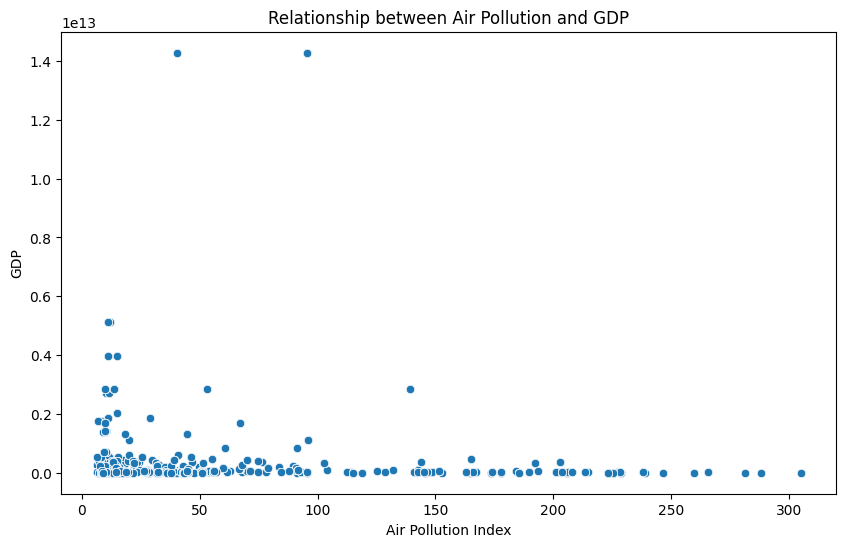

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_merged_df['Air_Pollution_Index'], y=final_merged_df['GDP'])
plt.xlabel('Air Pollution Index')
plt.ylabel('GDP')
plt.title('Relationship between Air Pollution and GDP')
plt.show()

3.2 : Scatter Plot: Temperature Anomalies vs GDP

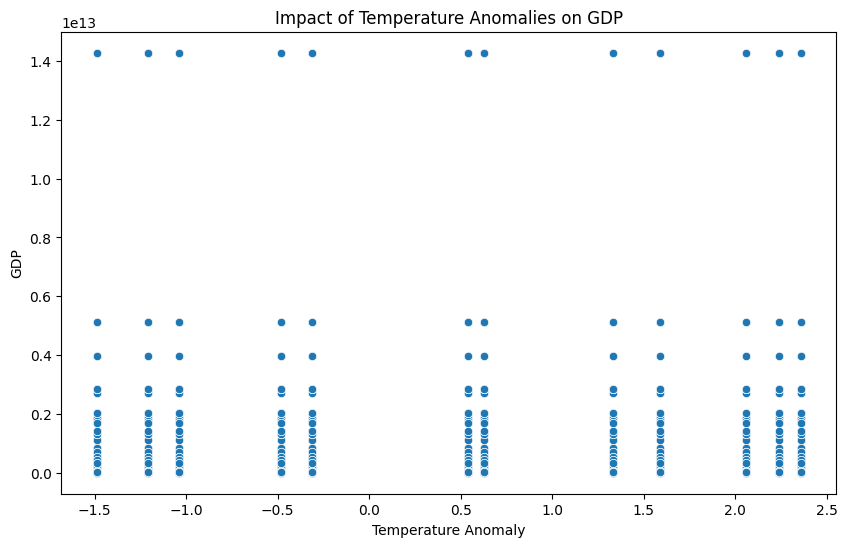

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_merged_df['Temp_Anomaly'], y=final_merged_df['GDP'])
plt.xlabel('Temperature Anomaly')
plt.ylabel('GDP')
plt.title('Impact of Temperature Anomalies on GDP')
plt.show()

3.3 : Line Plot : Global Temperature Anomalies Over Time

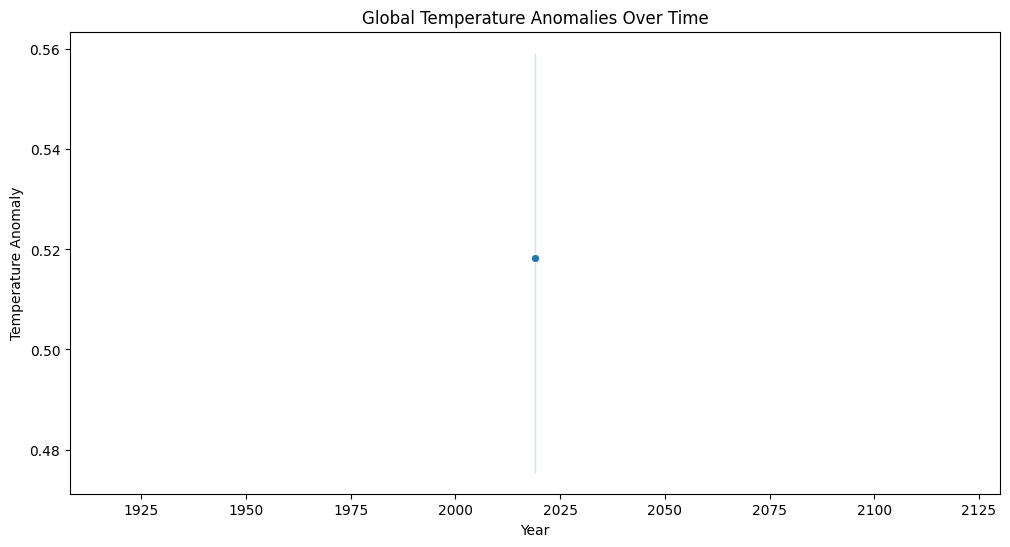

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=final_merged_df['Year'], y=final_merged_df['Temp_Anomaly'], marker='o')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Global Temperature Anomalies Over Time')
plt.show()

3.4 : Heatmap of Correlation Matrix

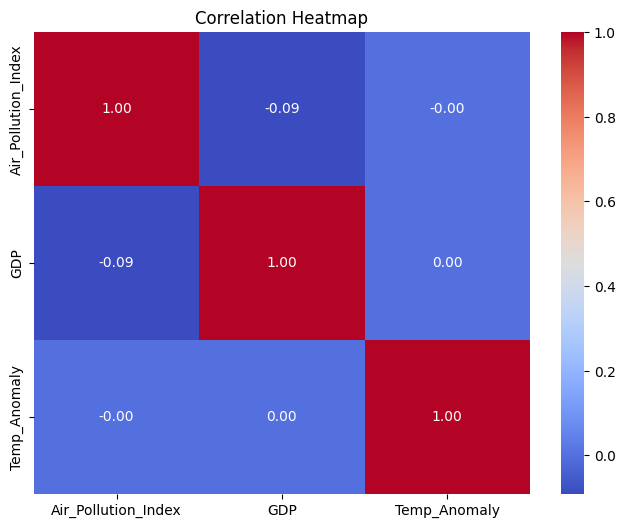

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Step 4 -> Statistical Modeling - Regression Analysis**

To quantify the relationship between Air Pollution, Temperature Anomalies, and GDP, i shall use Linear Regression.

4.1 : Install Required Libraries

In [13]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

4.2 : Prepare Data for Regression

In [14]:
# Select relevant columns
df_regression = final_merged_df[['Air_Pollution_Index', 'Temp_Anomaly', 'GDP']].dropna()

# Define independent variables (X) and dependent variable (y)
X = df_regression[['Air_Pollution_Index', 'Temp_Anomaly']]  # Predictors
y = df_regression['GDP']  # Target variable

# Add a constant (intercept) to X for statsmodels
X = sm.add_constant(X)

# Split data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.3 : Train Linear Regression Model

In [15]:
# Train the model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train).fit()

# Print the regression results summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     11.58
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           9.82e-06
Time:                        04:43:41   Log-Likelihood:                -87894.
No. Observations:                2995   AIC:                         1.758e+05
Df Residuals:                    2992   BIC:                         1.758e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.978e+11   3

4.4 : Predict and Evaluate the Model

In [16]:
# Train the model using sklearn
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict GDP using the test set
y_pred = regressor.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 1.4027177141673478e+24
R-squared Score: 0.011455478598730084


4.5 : Visualizing Regression Results

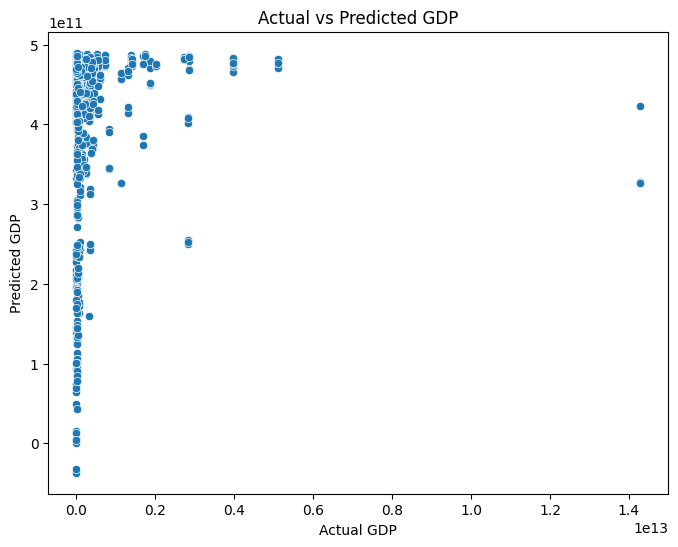

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.show()

-> Plot: Residuals Distribution

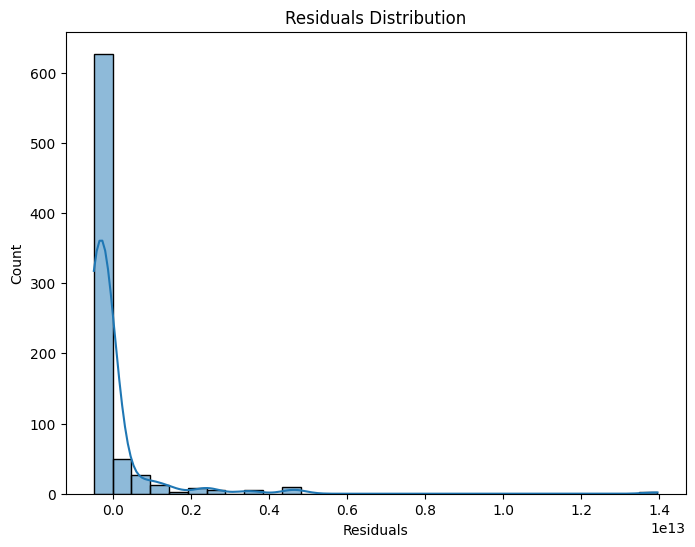

In [18]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

-> Interpret Model Results :
*   Check p-values in model.summary() to determine statistical significance.
*   Check R² score for model performance.

-> Consider More Features :
*   Additional economic indicators, population, CO2 emissions, etc.

-> Perform More Advanced Analysis :
*   Polynomial regression, Time-Series Analysis, etc.





